In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv("telesurgery_cybersecurity_dataset.csv")

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Robot Gesture ID               1000 non-null   int64  
 1   Gesture Type                   1000 non-null   object 
 2   Gesture Coordinates (x, y, z)  1000 non-null   object 
 3   Timestamp                      1000 non-null   object 
 4   Gesture Duration (sec)         1000 non-null   float64
 5   Robot Status                   1000 non-null   object 
 6   Message ID                     1000 non-null   int64  
 7   Sender                         1000 non-null   object 
 8   Receiver                       1000 non-null   object 
 9   Encryption Algorithm Used      1000 non-null   object 
 10  Encryption Status              1000 non-null   object 
 11  Network Latency (ms)           1000 non-null   int64  
 12  Data Transfer Rate (Mbps)      1000 non-null   in

In [244]:
df.head()

,Robot Gesture ID,Gesture Type,"Gesture Coordinates (x, y, z)",Timestamp,Gesture Duration (sec),Robot Status,Message ID,Sender,Receiver,Encryption Algorithm Used,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
0,10,Incision,"(1.48, 1.4, 0.02)",2025-02-14 16:32:27,4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",2025-02-14 16:32:27,3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",2025-02-14 16:32:27,1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,NaN,0
3,1,Incision,"(1.63, 1.74, 1.92)",2025-02-14 16:32:27,2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",2025-02-14 16:32:27,1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1


In [245]:
df["Response Action Taken"] = df["Response Action Taken"].apply(lambda x: "No Threat" if pd.isna(x) else x)


In [246]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gesture Type'] = label_encoder.fit_transform(df['Gesture Type'])

In [247]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Robot Status'] = label_encoder.fit_transform(df['Robot Status'])

In [248]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sender'] = label_encoder.fit_transform(df['Sender'])

In [249]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Receiver'] = label_encoder.fit_transform(df['Receiver'])

In [250]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Encryption Algorithm Used'] = label_encoder.fit_transform(df['Encryption Algorithm Used'])

In [251]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Encryption Status'] = label_encoder.fit_transform(df['Encryption Status'])

In [252]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Threat Type'] = label_encoder.fit_transform(df['Threat Type'])

In [253]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Threat Severity'] = label_encoder.fit_transform(df['Threat Severity'])

In [254]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Response Action Taken'] = label_encoder.fit_transform(df['Threat Type'])

In [255]:
df.columns

Index(['Robot Gesture ID', 'Gesture Type', 'Gesture Coordinates (x, y, z)',
       'Timestamp', 'Gesture Duration (sec)', 'Robot Status', 'Message ID',
       'Sender', 'Receiver', 'Encryption Algorithm Used', 'Encryption Status',
       'Network Latency (ms)', 'Data Transfer Rate (Mbps)', 'Threat Type',
       'Threat Severity', 'Response Time (sec)', 'Response Action Taken',
       'Threat Detected'],
      dtype='object')

In [256]:
df = df[['Robot Gesture ID', 'Gesture Type',
        'Gesture Duration (sec)', 'Robot Status', 
       'Sender', 'Receiver', 'Encryption Status',
       'Network Latency (ms)', 'Data Transfer Rate (Mbps)', 'Threat Type',
       'Threat Severity', 'Response Time (sec)', 'Response Action Taken',
       'Threat Detected']]

In [257]:
df

,Robot Gesture ID,Gesture Type,Gesture Duration (sec),Robot Status,Sender,Receiver,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
0,10,2,4.37,1,0,1,0,11,97,2,1,4.63,2,1
1,8,1,3.08,1,0,1,0,9,88,1,1,3.94,1,1
2,9,2,1.11,0,0,1,0,7,26,3,1,0.00,3,0
3,1,2,2.72,1,0,1,0,13,56,0,0,4.58,0,1
4,4,4,1.20,1,1,0,1,5,41,2,1,2.46,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1.39,1,0,1,0,7,41,2,0,3.47,2,1
996,9,3,2.11,1,0,1,1,14,26,0,2,3.89,0,1
997,9,3,2.09,1,0,1,1,8,20,2,0,1.83,2,1
998,1,3,1.01,1,1,0,0,8,14,3,2,0.00,3,0


<Axes: >

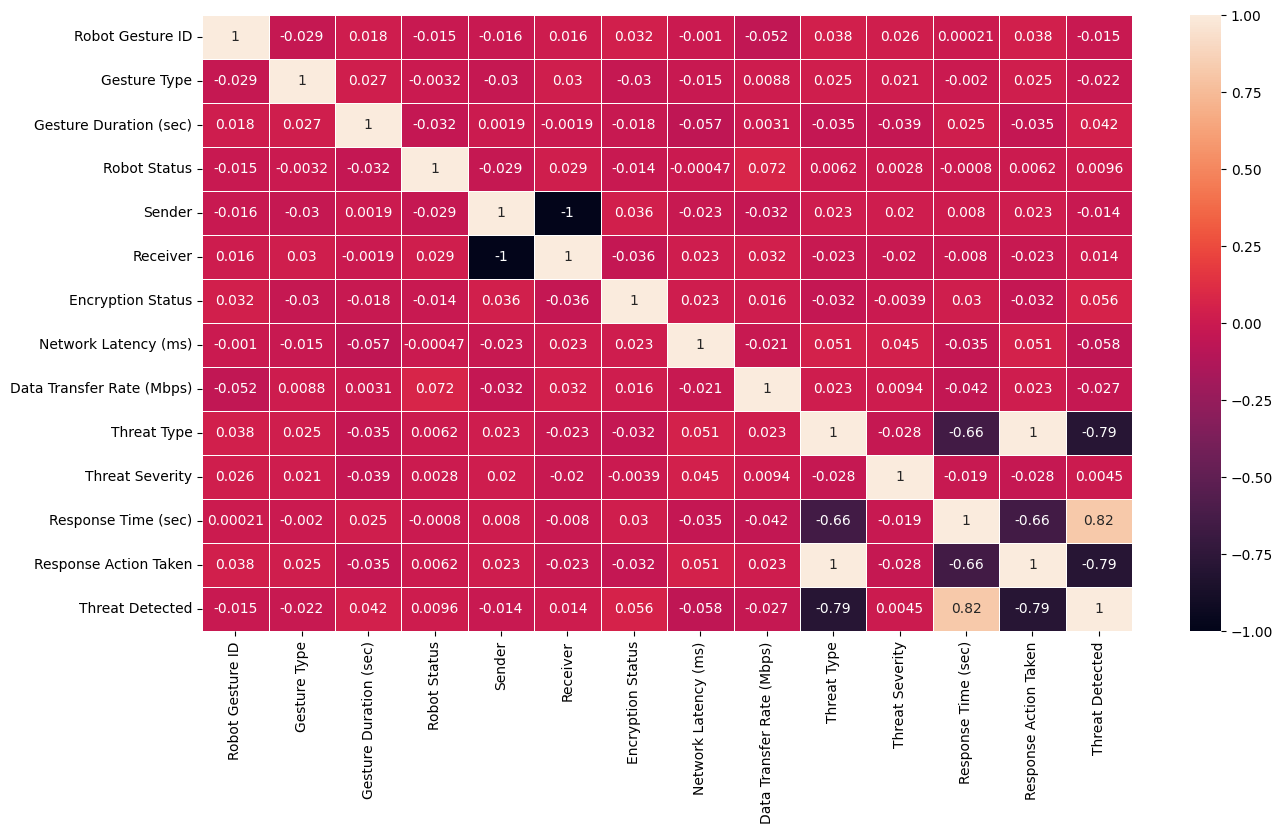

In [258]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [259]:
from imblearn.combine import SMOTETomek
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [260]:
smo_tek = SMOTETomek()
X_smotek, y_smotek = smo_tek.fit_resample(X, Y)

In [261]:
from collections import Counter
Counter(Y)
Counter(y_smotek)

Counter({1: 716, 0: 716})

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smotek, y_smotek, test_size=0.25, random_state=33)

In [263]:
X_train.shape

(1074, 13)

In [264]:
y_train

1215    0
1419    0
922     1
1258    0
417     1
       ..
1225    0
658     1
578     1
391     0
1044    0
Name: Threat Detected, Length: 1074, dtype: int64

In [265]:
X_train.nunique()

Robot Gesture ID              10
Gesture Type                   5
Gesture Duration (sec)       674
Robot Status                   2
Sender                         2
Receiver                       2
Encryption Status              2
Network Latency (ms)          16
Data Transfer Rate (Mbps)     91
Threat Type                    4
Threat Severity                3
Response Time (sec)          304
Response Action Taken          4
dtype: int64

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       173

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [267]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9357541899441341
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       185
           1       0.97      0.90      0.93       173

    accuracy                           0.94       358
   macro avg       0.94      0.93      0.94       358
weighted avg       0.94      0.94      0.94       358



In [268]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       173

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [269]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       173

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [270]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       173

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [271]:
X_train

,Robot Gesture ID,Gesture Type,Gesture Duration (sec),Robot Status,Sender,Receiver,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken
1215,7,1,3.981702,0,0,0,0,14,42,3,0,0.00,3
1419,4,2,2.416363,0,0,0,0,8,49,3,1,0.00,3
922,4,4,4.540000,0,1,0,0,7,99,2,0,3.16,2
1258,4,2,2.777895,0,0,0,0,7,48,3,1,0.00,3
417,1,3,1.770000,1,0,1,1,8,91,2,0,2.46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,5,1,1.949715,1,0,0,0,5,91,3,1,0.00,3
658,5,2,3.010000,0,1,0,1,6,12,2,2,4.94,2
578,8,3,2.660000,1,0,1,1,20,20,1,1,3.02,1
391,5,1,2.400000,0,0,1,0,20,37,3,2,0.00,3


In [272]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       173

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [273]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       173

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [274]:
import pickle
pickle.dump(forest, open('model.pkl', 'wb'))

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load the trained scikit-learn model
model = joblib.load("model.pkl")  # Update with your actual model path

In [293]:
a = df.iloc[3:4,:-1]

In [294]:
# Convert DataFrame to NumPy array
input_data = a

# Make a prediction
prediction = model.predict(input_data)

# Print the result
print("Predicted Threat Detected:", prediction[0])  # Assuming binary classification (0 = No Threat, 1 = Threat)


Predicted Threat Detected: 1
